In [4]:
# Install necessary libraries
!pip install psutil pandas matplotlib

import psutil
import pandas as pd
import numpy as np
import datetime
import time
import os
import random
import matplotlib.pyplot as plt

# Settings for dataset generation
sampling_rate_hz = 10  # Data points per second
chunk_size_rows = 100_000  # Number of rows per chunk
output_dir = "large_dataset"  # Directory to store chunks
os.makedirs(output_dir, exist_ok=True)
target_size_gb = 1  # Target dataset size in GB

# Function to generate synthetic data
def generate_data():
    timestamps = []
    cpu_temperatures = []
    cpu_usages = []
    memory_usages = []
    battery_levels = []
    cpu_powers = []

    for _ in range(chunk_size_rows):
        # Record the current timestamp
        timestamps.append(datetime.datetime.now())

        # Generate synthetic data for each feature
        cpu_usages.append(random.uniform(0, 100))  # Simulate CPU usage
        cpu_temperatures.append(random.uniform(30, 100))  # Simulate CPU temperature
        memory_usages.append(random.uniform(0, 100))  # Simulate memory usage
        battery_levels.append(random.uniform(0, 100))  # Simulate battery level
        cpu_powers.append(random.uniform(0, 50))  # Simulate CPU power

        # Introduce anomalies (10% probability)
        if random.random() < 0.1:
            cpu_usages[-1] = random.uniform(90, 100)  # High CPU usage anomaly
        if random.random() < 0.1:
            cpu_temperatures[-1] = random.uniform(90, 110)  # High temperature anomaly
        if random.random() < 0.1:
            memory_usages[-1] = random.uniform(95, 100)  # High memory usage anomaly
        if random.random() < 0.1:
            battery_levels[-1] = random.uniform(0, 10)  # Low battery anomaly
        if random.random() < 0.1:
            cpu_powers[-1] = random.uniform(50, 100)  # High CPU power anomaly

    # Return the generated data as a DataFrame
    return pd.DataFrame({
        'timestamp': timestamps,
        'cpu_temperature': cpu_temperatures,
        'cpu_usage': cpu_usages,
        'memory_usage': memory_usages,
        'battery_level': battery_levels,
        'cpu_power': cpu_powers,
    })

# Save dataset incrementally until it reaches the target size
total_size_bytes = 0
chunk_idx = 0

print("Generating synthetic dataset...")
while total_size_bytes < target_size_gb * 1024**3:  # 1 GB target
    print(f"Generating chunk {chunk_idx + 1}...")
    df_chunk = generate_data()

    # Save the chunk to a CSV file
    chunk_file = os.path.join(output_dir, f"chunk_{chunk_idx + 1}.csv")
    df_chunk.to_csv(chunk_file, index=False)

    # Update total size
    total_size_bytes += os.path.getsize(chunk_file)
    chunk_idx += 1
    print(f"Total size so far: {total_size_bytes / (1024**3):.2f} GB")

print("Data generation complete!")

# Combine all chunks into a single dataset
print("Combining chunks...")
file_paths = [os.path.join(output_dir, f) for f in os.listdir(output_dir)]
df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)
print(f"Final dataset size: {df.memory_usage(deep=True).sum() / (1024**3):.2f} GB")

# Save the combined dataset
df.to_csv("synthetic_dataset.csv", index=False)
print("Final dataset saved as synthetic_dataset.csv.")

# Display a preview of the dataset
df.head()


Generating synthetic dataset...
Generating chunk 1...
Total size so far: 0.01 GB
Generating chunk 2...
Total size so far: 0.02 GB
Generating chunk 3...
Total size so far: 0.03 GB
Generating chunk 4...
Total size so far: 0.04 GB
Generating chunk 5...
Total size so far: 0.05 GB
Generating chunk 6...
Total size so far: 0.07 GB
Generating chunk 7...
Total size so far: 0.08 GB
Generating chunk 8...
Total size so far: 0.09 GB
Generating chunk 9...
Total size so far: 0.10 GB
Generating chunk 10...
Total size so far: 0.11 GB
Generating chunk 11...
Total size so far: 0.12 GB
Generating chunk 12...
Total size so far: 0.13 GB
Generating chunk 13...
Total size so far: 0.14 GB
Generating chunk 14...
Total size so far: 0.15 GB
Generating chunk 15...
Total size so far: 0.16 GB
Generating chunk 16...
Total size so far: 0.18 GB
Generating chunk 17...
Total size so far: 0.19 GB
Generating chunk 18...
Total size so far: 0.20 GB
Generating chunk 19...
Total size so far: 0.21 GB
Generating chunk 20...
Tota

,timestamp,cpu_temperature,cpu_usage,memory_usage,battery_level,cpu_power
0,2024-11-29 17:40:37.438275,88.158435,21.645201,37.875452,63.130124,21.227672
1,2024-11-29 17:40:37.438293,37.315316,50.565633,95.469235,85.558696,21.214750
2,2024-11-29 17:40:37.438299,49.137958,2.146919,28.580663,14.364353,15.625110
3,2024-11-29 17:40:37.438304,88.143693,23.146941,42.580225,31.682651,1.722622
4,2024-11-29 17:40:37.438309,105.846583,99.429427,36.549992,23.968523,56.498704


In [5]:
# Apply Z-score anomaly detection
def detect_anomalies(df, columns, threshold=3):
    anomalies = {}
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        z_scores = np.abs((df[col] - mean) / std)
        df[f"{col}_anomaly"] = z_scores > threshold
        anomalies[col] = df[df[f"{col}_anomaly"]]
    return df, anomalies

# Columns to analyze for anomalies
columns_to_check = ['cpu_temperature', 'cpu_usage', 'memory_usage', 'battery_level', 'cpu_power']

# Detect anomalies
df, anomalies = detect_anomalies(df, columns_to_check)

# Save the dataset with anomaly flags
df.to_csv("anomaly_detected_dataset.csv", index=False)
print("Anomaly detection completed. Dataset saved as anomaly_detected_dataset.csv.")

# Display sample anomalies
for col, anomaly_df in anomalies.items():
    print(f"\nAnomalies detected in {col}:")
    print(anomaly_df.head())


Anomaly detection completed. Dataset saved as anomaly_detected_dataset.csv.

Anomalies detected in cpu_temperature:
Empty DataFrame
Columns: [timestamp, cpu_temperature, cpu_usage, memory_usage, battery_level, cpu_power, cpu_temperature_anomaly]
Index: []

Anomalies detected in cpu_usage:
Empty DataFrame
Columns: [timestamp, cpu_temperature, cpu_usage, memory_usage, battery_level, cpu_power, cpu_temperature_anomaly, cpu_usage_anomaly]
Index: []

Anomalies detected in memory_usage:
Empty DataFrame
Columns: [timestamp, cpu_temperature, cpu_usage, memory_usage, battery_level, cpu_power, cpu_temperature_anomaly, cpu_usage_anomaly, memory_usage_anomaly]
Index: []

Anomalies detected in battery_level:
Empty DataFrame
Columns: [timestamp, cpu_temperature, cpu_usage, memory_usage, battery_level, cpu_power, cpu_temperature_anomaly, cpu_usage_anomaly, memory_usage_anomaly, battery_level_anomaly]
Index: []

Anomalies detected in cpu_power:
                      timestamp  cpu_temperature  cpu_usa

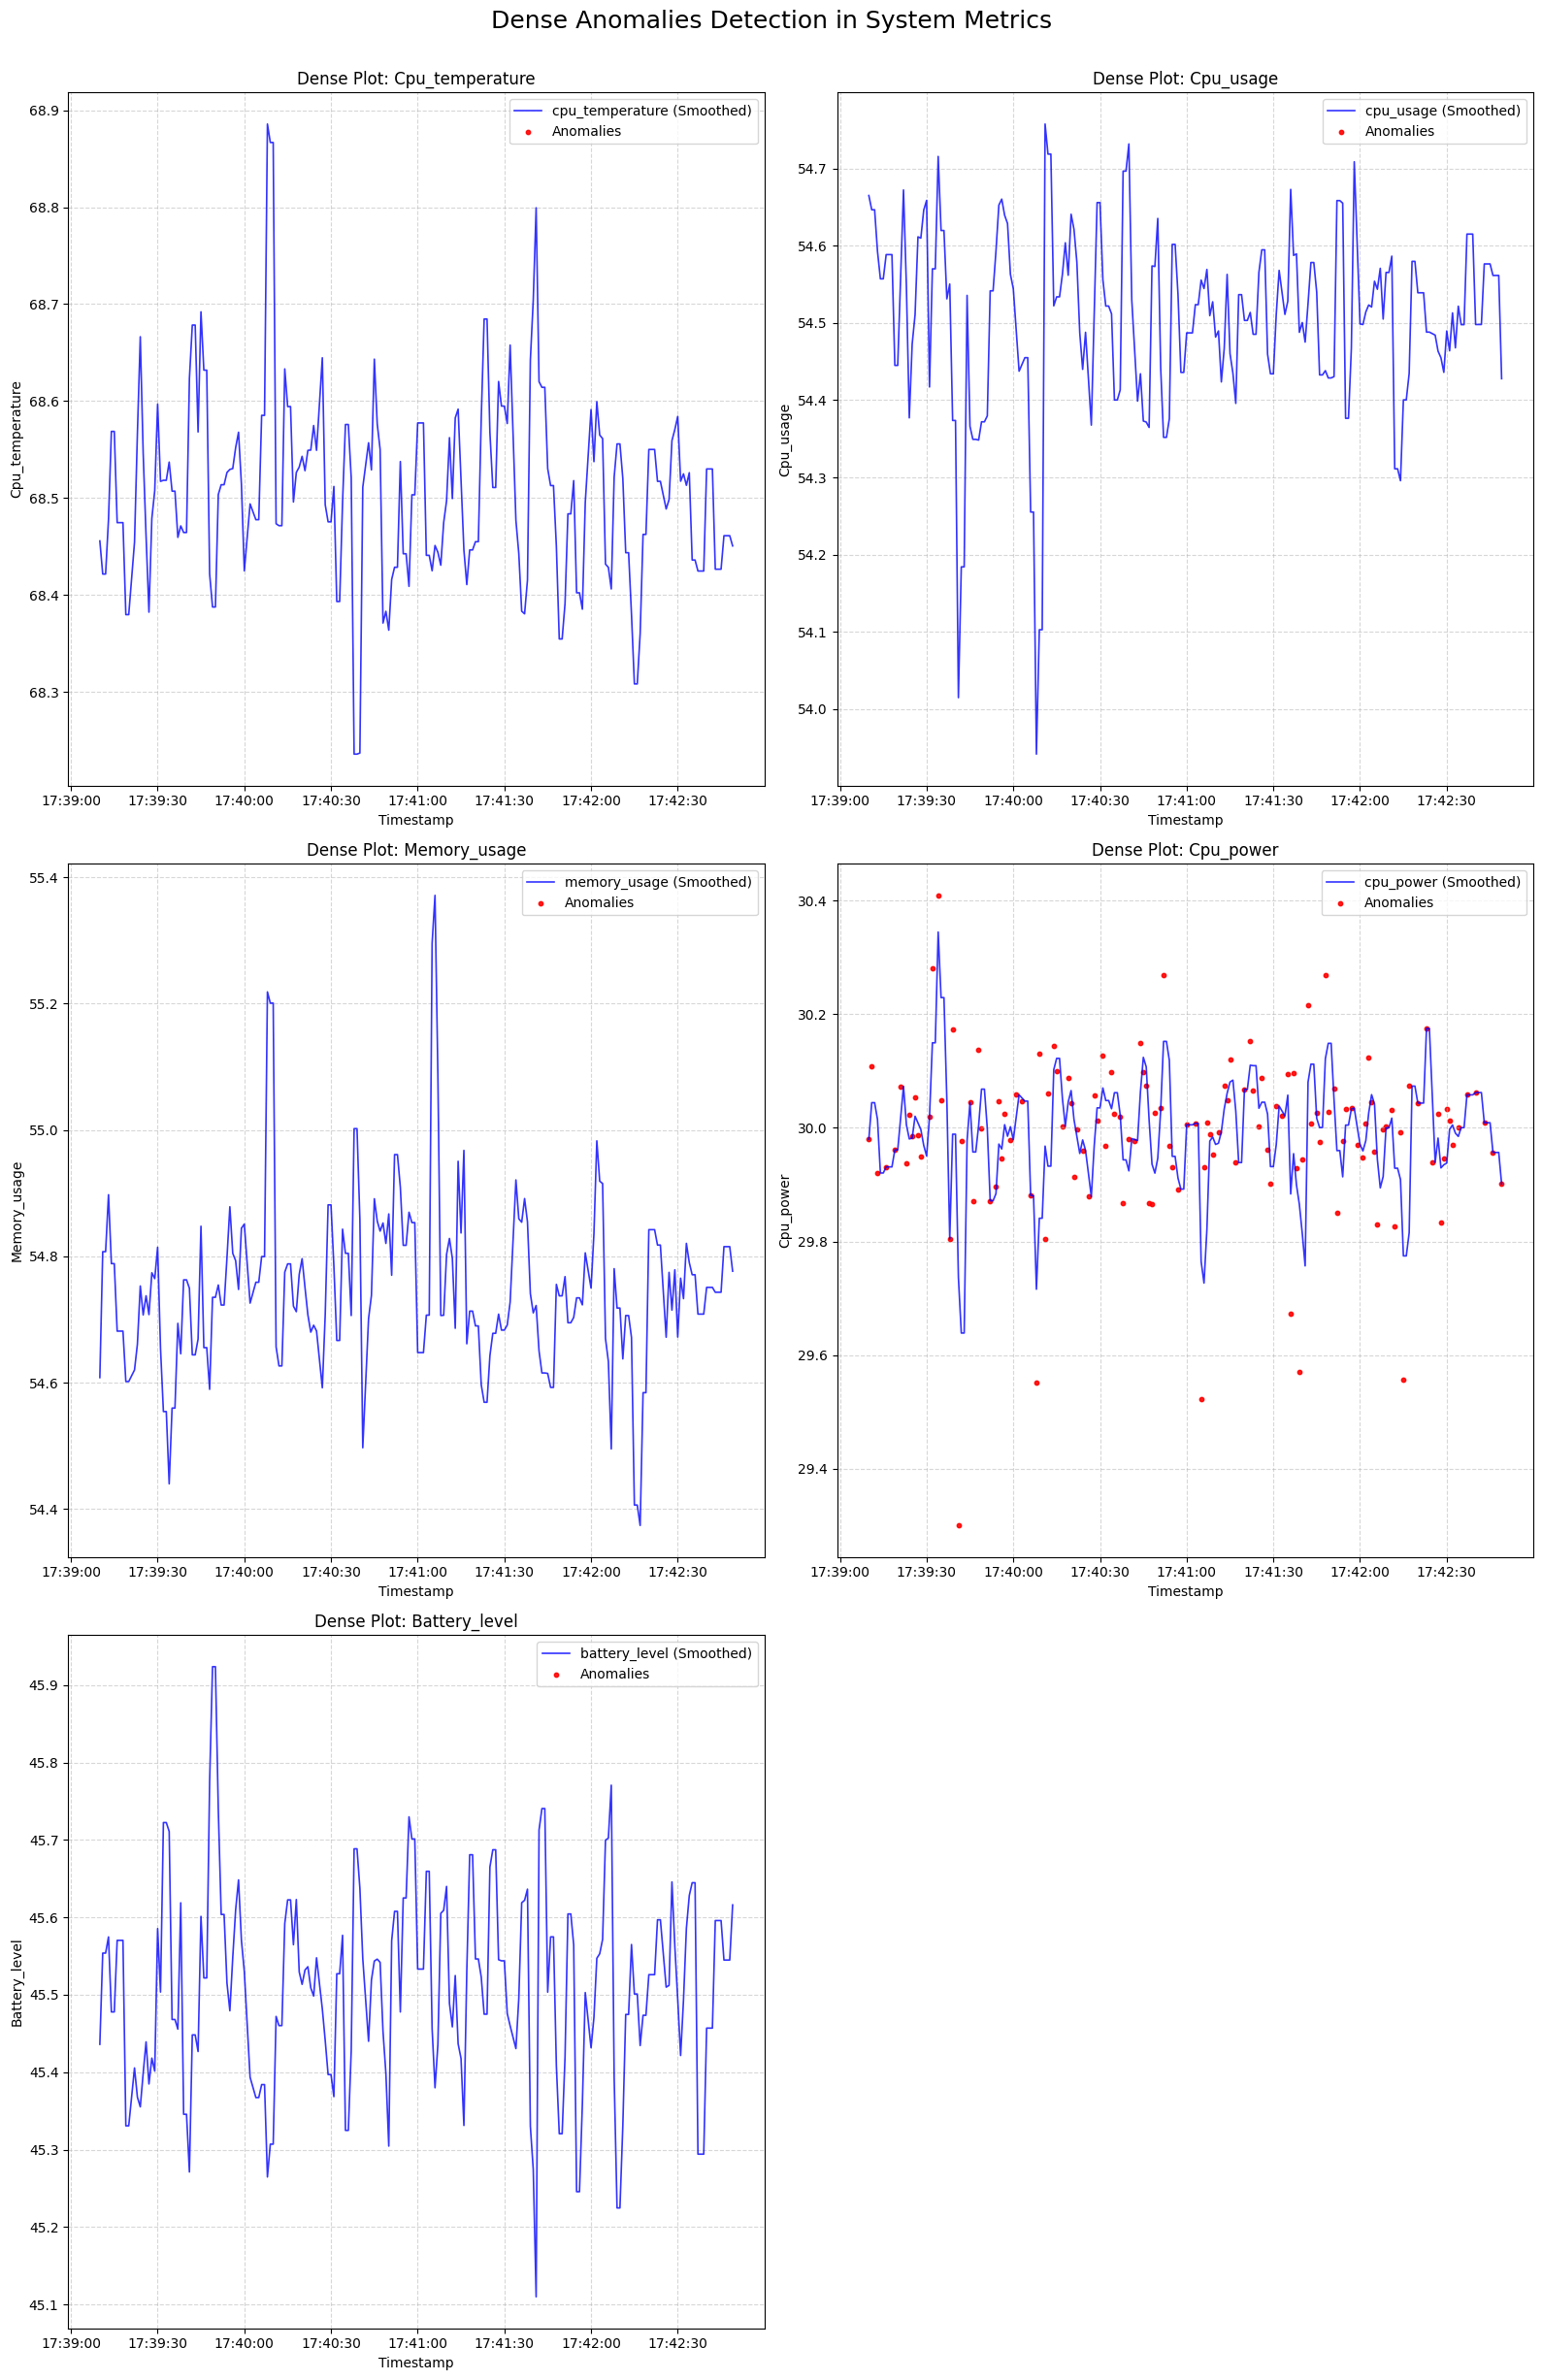

In [12]:
import matplotlib.pyplot as plt

def plot_dense_anomalies(df, features, time_window='1s', alpha=0.7, rolling_window=5):
    """
    Plot a dense graph for multiple features with anomalies.
    """
    n_features = len(features)
    rows = (n_features // 2) + (1 if n_features % 2 != 0 else 0)  # Dynamic grid layout

    # Create subplots
    fig, axes = plt.subplots(rows, 2, figsize=(16, 8 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        # Aggregate data within fixed time windows
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        aggregated_df = (
            df.resample(time_window, on='timestamp')
            .agg({feature: 'mean', f"{feature}_anomaly": 'max'})
            .reset_index()
        )

        # Apply rolling smoothing
        aggregated_df[f'{feature}_smoothed'] = aggregated_df[feature].rolling(rolling_window, min_periods=1).mean()

        # Separate anomalies
        anomalous_points = aggregated_df[aggregated_df[f"{feature}_anomaly"] > 0]

        # Plot dense feature data
        ax = axes[i]
        ax.plot(aggregated_df['timestamp'], aggregated_df[f'{feature}_smoothed'], label=f"{feature} (Smoothed)",
                color='blue', alpha=alpha, linewidth=1.2)
        ax.scatter(anomalous_points['timestamp'], anomalous_points[feature], color='red', s=10, label='Anomalies', alpha=0.9)
        ax.set_title(f"Dense Plot: {feature.capitalize()}")
        ax.set_xlabel('Timestamp')
        ax.set_ylabel(feature.capitalize())
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend()

    # Remove extra subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.suptitle("Dense Anomalies Detection in System Metrics", y=1.02, fontsize=18)
    plt.show()


# Features to plot
features_to_plot = ['cpu_temperature', 'cpu_usage', 'memory_usage', 'cpu_power', 'battery_level']

# Add anomaly columns if not present
for feature in features_to_plot:
    if f"{feature}_anomaly" not in df.columns:
        df[f"{feature}_anomaly"] = (df[feature] > df[feature].mean() + 3 * df[feature].std()) | \
                                   (df[feature] < df[feature].mean() - 3 * df[feature].std())

# Call the dense plotting function
plot_dense_anomalies(df, features_to_plot, time_window='1s', alpha=0.8, rolling_window=3)
